# Задача 1

## Постановка задачи

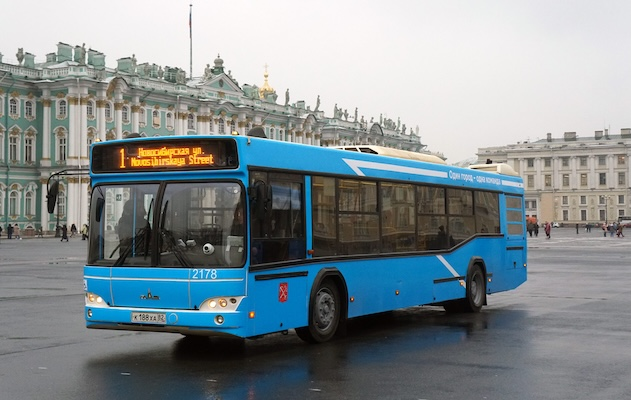

Представим, что мы приехали в незнакомый город. Гуляя по нему, мы встречаем автобус, следующий по маршруту номер $100$. Ради любопытства зададимся вопросом, а сколько автобусных маршрутов вообще в этом городе?

**Дисклеймер 1**: можно воспользоваться гуглом, но это не наш метод, ведь нормальные герои всегда идут в обход.

**Дисклеймер 2**: про оригинальную ["Задачу о немецких танках" можно почитать вот тут](https://en.wikipedia.org/wiki/German_tank_problem).

Разумные вопросы:
* Может ли быть меньше $100$ маршрутов? Очевидно, что нет, раз нам встретился маршрут с номером $100$ (будем считать, что городом управляют адекватные люди без причуд).
* Может ли быть ровно $100$ маршрутов? В принципе, да, но значит нам повезло встретить именно его представителя.
* Может ли быть сильно больше $100$ маршрутов, например, $10 \ 000$? Может, но тогда наш встреченный представитель $100$ очень "ранний", что скорее всего тоже маловероятно.

Нужно формализовать задачу

Предположим, что мы случайным образом увидели автобус одного маршрута среди всех $\theta$ маршрутов, курсирующих в городе.

Это значит:

Все маршруты равновероятны к наблюдению (у нас нет оснований полагать, что № $100$ ходит чаще или реже других).
Тогда номер увиденного автобуса — это случайная величина $X$, равномерно распределённая на множестве целых чисел $\{1, 2, \ldots, \theta\}$. То есть $X \sim \mathsf{U}_{1, 2, ..., \theta}$ и


$$
 \mathsf{P}(X = x \mid \theta) = \begin{cases} \frac{1}{\theta}, & \text{если } 1 \leq x \leq \theta,\ \\ 0, & \text{иначе}. \end{cases}
$$

## Оценка MLE

Правдоподобие выборки $\mathbf{x} = (x_1, \dots, x_n)$:
$$
\prod_{i=1}^{n} \mathsf{P}(x_i \mid \theta)
= \begin{cases}
\frac{1}{\theta^n}, & \text{если } \theta \geq \max(x_1, \dots, x_n),\\
0, & \text{иначе}.
\end{cases}
$$

Обозначим $X_{(n)} = \max(x_1, \dots, x_n)$. Тогда правдоподобие будет иметь следующий вид:
$$
\begin{cases}
\theta^{-n}, & \theta \geq X_{(n)},\\
0, & \theta < X_{(n)}.
\end{cases}
$$

Функция $\theta^{-n}$ убывает по $\theta$ (при $\theta > 0$). Значит, среди всех допустимых значений $\theta \geq X_{(n)}$, правдоподобие максимально при наименьшем возможном $\theta$, то есть:

$$
\hat{\theta}_{\text{MLE}} = X_{(n)} = \max(x_1, \dots, x_n).
$$

В нашем случае $\hat{\theta}_{\text{MLE}} = 100$. Как-то не очень верится в такой результат.

## Байесовская оценка

С учетом того, что оценка MLE дает нам тривиальные результаты, а в условиях задачи много неопределенности — имеет смысл рассмотреть байесовскую оценку параметра $\theta$:

$$
\mathsf P(\theta|D) = \frac{\mathsf P(\theta)\mathsf P(D|\theta)}{\mathsf P(D)}.
$$

Начнем с выбора априорного распределения $\mathsf P(\theta)$. Что мы хотим от этого распределения? Чтобы носитель "имел плотность" начиная с какого-то значения и можно было регулировать вероятность его "удаления" от точки старта. Например, вот так (два варианта на обсуждение, в чем отличие?)

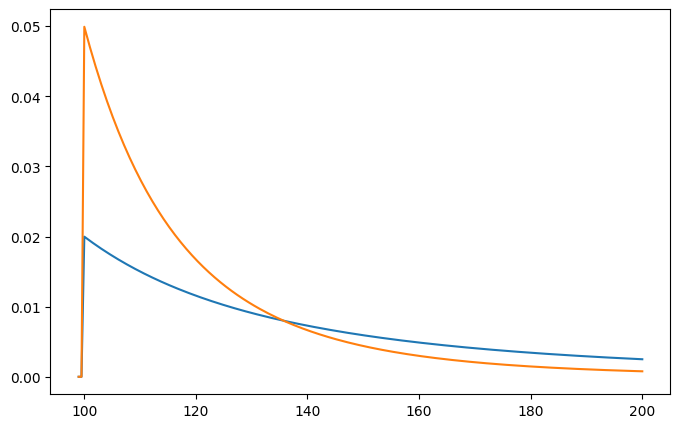

In [ ]:
# @title
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pareto
import numpy as np

plt.figure(figsize=(8,5))

# В либе используется scale = 1/b
shapes = [2, 5]
start_points = [100, 100]
xlin = np.linspace(99.01,200,200)

# b отвечает за форму (насколько тяжелый хвост), scale отвечает за высоту

for shape, start_point in zip (shapes, start_points):
  plt.plot(xlin,pareto.pdf(xlin, b = shape, scale=start_point), label="k = " + str(shape) + ', $x_m$ = ' + str(start_point))
#plt.legend(loc="upper right")
# plt.ylim([0,3])
# plt.xlim([0.99,2])

Оказывается есть такое распределение, оно называется распределением [Парето](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE).

Если случайная величина $\xi$ имеет распределение Парето с параметрами $k,x_m >0$, то

$$
f_{\xi}(x) =
\begin{cases}
\frac{kx_m^k}{x^{k+1}}, & x \geq x_m \\
0, & x<x_m
\end{cases},
$$

$$
\mathsf{E}\xi = \frac{kx_m}{k-1}, \quad k>1.
$$

При этом параметр параметр $x_m$ отвечает за точку старта. Параметр $k$ отвечает за форму распределения. В нашем случае можно его назвать параметром «уверенности»:
* Маленький $k$ (например, $1$) — слабый априор (мы почти ничего не знаем, и полностью доверяем данным).
* Большой $k$ (например, $5$) — сильный априор (мы уверены, что $\theta$ не очень сильно превышает $x_m$.

In [ ]:
# @title Пример

#Данные -- зарплаты футболистов в игре FIFA


# plt.figure(figsize=(10,6))

# limit = 10000

# data_football = pd.read_csv('/content/players_21.csv')
# data_new = data_football[['short_name','wage_eur']].dropna().sort_values(by='wage_eur')[::-1][:limit]
# plt.bar(list(range(limit)), data_new.wage_eur)
# plt.show()

# fraction = data_new.wage_eur[:int(len(data_new.wage_eur)*0.3)].sum()
# total = data_new.wage_eur.sum()
# print('30% игроков зарабатывают {}% денег'.format(np.round(fraction/total,2)*100))

# fraction = data_new.wage_eur[-int(len(data_new.wage_eur)*0.7):].sum()
# total = data_new.wage_eur.sum()
# print('70% игроков зарабатывают {}% денег'.format(np.round(fraction/total,2)*100))

Остальные части выражения для байесовской оценки $\theta$ будут иметь следующий вид:

$$
\mathsf P(D|\theta) = \begin{cases} \frac{1}{\theta^{n}}, & \theta \geq X_{(n)} \\
0 & \text{иначе},
\end{cases}.
$$

$$
\mathsf P(D) = \int\limits_{\theta}\mathsf P(\theta)\cdot \mathsf P(D|\theta) d\theta.
$$

Итого:

$$
\mathsf P(\theta|D) = \frac{\frac{kx_m^k}{\theta^{k+1}}\cdot \frac{1}{\theta^{n}}}{\int\limits_{\theta}\frac{kx_m^k}{\theta^{k+1}}\cdot \frac{1}{\theta^{n}}d\theta} = \frac{\frac{1}{\theta^{n+k+1}}}{\int\limits_{\theta}\frac{1}{\theta^{n+k+1}}d\theta}.
$$

С учетом того, что $\theta \geq x_{m}$ и $\theta \geq X_{(n)}$, получаем, что $\theta \geq m = \max{(X_{(n)}, x_m)}$. Тогда

$$
\mathsf P(\theta|D) = \frac{\frac{1}{\theta^{n+k+1}}}{\int\limits_{m}^{+\infty}\frac{1}{\theta^{n+k+1}}d\theta}.
$$

Рассмотрим отдельно знаменатель:

$$
\int\limits_{m}^{+\infty}\frac{1}{\theta^{n+k+1}}d\theta = \int\limits_{m}^{+\infty}\theta^{-(n+k+1)}d\theta = \frac{\theta^{-(n+k+1)+1}}{-(n+k+1)+1}\bigg|^{+\infty}_m =
$$

$$
= \frac{\theta^{-(n+k)}}{-(n+k)}\bigg|^{+\infty}_m = \lim_{b \to +\infty} \frac{\theta^{-(n+k)}}{-(n+k)}\bigg|^{b}_m = \lim_{b \to +\infty} \frac{b^{-(n+k)} - m^{-(n+k)}}{-(n+k)} =
$$

$$
= \frac{1}{m^{n+k}(n+k)},
$$

откуда

$$
\mathsf P(\theta|D)= \frac{(n+k)m^{n+k}}{\theta^{n+k+1}}
$$

— тоже распределение Парето с параметрами $(n+k)$ и $m$.

Тогда если рассмотреть в качестве оценки параметра $\theta$ математическое ожидание, получим

$$
\widehat{\theta}_b = \frac{(n+k)m}{n+k-1}, \quad n+k > 1.
$$

Отвечая на изначальный вопрос задачи с учетом того, что мы ничего не знаем про сам город (положим $k=1$), получим следующее

In [ ]:
# Видели только один

seen = [100]
k = 1
m = max(seen)
n = len(seen)

theta = int((n + k) * m / (n + k-1))
theta

200

Если мы, допустим, увидели еще несколько номеров, так, что выборка теперь $[100, 50, 75, 150]$, получим

In [ ]:
# Видели следующие номера

seen = [100, 50, 75, 150]
k = 1
m = max(seen)
n = len(seen)

theta = int((n + k) * m / (n + k - 1))
theta

187

In [ ]:
# Понимаем, что-то про город (не очень много маршрутов), установим k = 10

seen = [100, 50, 75, 150]
k = 10
m = max(seen)
n = len(seen)

theta = int((n + k) * m / (n + k - 1))
theta

161

Исходя из вида оценки

$$
\widehat{\theta}_b = \frac{(n+k)m}{n+k-1}, \quad n+k > 1
$$

понятно, что с ростом объема выборки (при увеличении $n$) мы все больше полагаемся на данные и все меньше на априорные знания (в пределе — оценка MLE, если $m = X_{(n)}$, а не выбранный нами по какой-то причине $x_m$ из априорного распределения).

## Замечание

В процессе байесовского вывода мы брали в качестве априорного распределения распределеине Парето. В результате для апостерирорного распределения было также получено распределение Парето (с другими параметрами). Это не случайность, а ситуация так называемых [сопряженных распределений](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B0%D0%BF%D1%80%D0%B8%D0%BE%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5).

## Предсказательное распределение

### 💡 **Что такое предсказательное распределение и зачем оно нужно?**

**Проблема:** У нас есть оценка параметра θ, но мы не знаем его точно. Мы знаем только его **распределение** (апостериорное).

**Вопрос:** Как предсказать вероятность увидеть новый автобус с номером x?

**Неправильный способ (наивный):**
- Берем точечную оценку: $\widehat{\theta}_b = \frac{(n+k)m}{n+k-1}$
- Считаем: $\mathsf{P}(x|\theta = \widehat{\theta}_b) = \frac{1}{\widehat{\theta}_b}$ если $x \leq \widehat{\theta}_b$

**Проблема этого подхода:**
- Мы игнорируем неопределенность! Мы не знаем точное значение θ
- Если θ может быть 150, 200, 300 с разными вероятностями, нужно это учесть
- Точечная оценка дает только одно число, а не полную картину

**Правильный способ (байесовский):**
Предсказательное распределение **усредняет** по всем возможным значениям θ:

$$\mathsf{P}(x|D) = \int\limits_{\theta} \mathsf{P}(x|\theta) \cdot \mathsf{P}(\theta|D) d\theta$$

**Что это значит:**
- Для каждого возможного значения θ мы считаем вероятность увидеть x
- Умножаем на вероятность того, что θ именно такое (из апостериорного распределения)
- Суммируем (интегрируем) по всем возможным θ

**Результат:** Полное распределение вероятностей для нового наблюдения x, которое учитывает всю нашу неопределенность в параметре θ.

**Пример использования:**
- "Какова вероятность увидеть автобус №250?" — мы не знаем точно, сколько всего маршрутов, поэтому усредняем
- "Сколько разных маршрутов мы увидим за неделю?" — нужно учитывать неопределенность в θ
- "Сравнение моделей" — какая модель лучше предсказывает новые данные?

---



**Предсказательное распределение**

Напомним, что

$$
\mathsf P(x|D) = \int\limits_{\theta} \mathsf{P}(x|\theta)\mathsf{P}(\theta|D)d\theta.
$$

В случае равномерного распределения $\mathsf{P}(x|\theta) = \frac{1}{\theta}$.

Обозначив $m = \max{(X_{(n)}, x_m)}$, получим

$$
\mathsf P(x|D) = \int\limits_{\theta}\frac{(n+k)m^{n+k}}{\theta^{n+k+2}}d\theta.
$$

Границы интегрирования зависят от $x$, так как $\mathsf{P}(x|\theta) = 0$ при $x>\theta$. Тогда имеет смысл рассмотреть $2$ случая в зависимости от того, где находится $x$ относительно $m$.
Два интервала появляются из-за смены нижней границы интегрирования по θ.
Для новых наблюдений x ≤ m плотность постоянна по x и равна (n+k)/((n+k+1) m).
Чем больше данных (чем больше n+k), тем выше плотность слева от m и тем больше суммарная вероятность, что следующий номер будет уже знакомым.
Для x > m плотность убывает степенным законом — чем больше x, тем менее вероятно увидеть такой рекорд.

1. Пусть $x\leq m$, тогда $\theta \geq m$ и

$$
\mathsf P(x|D) = \int\limits_{m}^{+\infty}\frac{(n+k)m^{n+k}}{\theta^{n+k+2}}d\theta = \frac{n+k}{n+k+1}\cdot \frac{1}{m}.
$$

2. Пусть $x > m$, тогда мы имеем следующую ситуацию: чтобы $x$ могло быть наблюдаемым значением, $m$ должно быть по крайней мере не меньше, чем $x$. Это изменяет нижнюю границу интегрирования на $x$. Тогда имеем, что

$$
\mathsf P(x|D) = \int\limits_{x}^{+\infty}\frac{(n+k)m^{n+k}}{\theta^{n+k+2}}d\theta = \frac{n+k}{n+k+1}\cdot \frac{m^{n+k}}{x^{n+k+1}}.
$$

---

## 📚 **ПОЯСНЕНИЯ: Зачем нужно предсказательное распределение?**

### ❓ **Вопрос: Почему не использовать просто точечную оценку θ̂?**

**Неправильный подход (наивный):**
1. Вычислили оценку: $\widehat{\theta}_b = \frac{(n+k)m}{n+k-1}$
2. Подставили в формулу: $\mathsf{P}(x|\theta = \widehat{\theta}_b) = \frac{1}{\widehat{\theta}_b}$

**Проблема:** Это игнорирует неопределенность! Мы не знаем точное значение θ, мы знаем только его распределение.

**Правильный подход (байесовский):**
Предсказательное распределение усредняет по всем возможным значениям θ с учетом их вероятностей:

$$\mathsf{P}(x|D) = \int\limits_{\theta} \mathsf{P}(x|\theta) \cdot \mathsf{P}(\theta|D) d\theta$$

Это дает нам **полное распределение** для нового наблюдения, учитывающее всю неопределенность в параметре θ.

### 🎯 **Где это используется?**

1. **Прогнозирование:** "Какова вероятность увидеть автобус №200?" — мы не знаем точно θ, поэтому усредняем по всем возможным значениям
2. **Планирование:** "Сколько разных маршрутов мы увидим за месяц?" — нужно учитывать неопределенность
3. **Сравнение моделей:** Можно сравнить, какая модель лучше предсказывает новые данные

### 🔍 **Почему два случая для x и m?**

Границы интегрирования зависят от того, что больше: x или m.

**Случай 1: x ≤ m**
- Мы уже знаем, что θ ≥ m (из данных и априора)
- Поэтому нижняя граница интегрирования = m
- Результат: постоянная вероятность для всех x ≤ m

**Случай 2: x > m**  
- Чтобы x могло быть наблюдаемым, нужно θ ≥ x
- Поэтому нижняя граница интегрирования = x (а не m!)
- Результат: вероятность убывает с ростом x

**Интуиция:** Если мы хотим предсказать очень большой номер (x > m), это менее вероятно, потому что для этого нужен очень большой θ.

---



# Гамма распределение

Гамма распределние достаточно часто используется в качестве сопряженного. Напомним, как оно выглядит.

Пусть случайная величина $\xi$ имеет Гамма распределение с параметрами $a,b >0$,  тогда

$$
f_{\xi}(x) =
\begin{cases}
\frac{b^a}{\Gamma (a)}x^{a-1}e^{-bx}, & x \geq 0 \\
0, & x<0
\end{cases},
$$

$\Gamma(a)$ — гамма функция.

Параметр $a$ отвечает за форму, а $b$ — за масштаб (или еще говорят скорость). Математическое ожидание и дисперсия выглядят следующим образом:

$$
\mathsf{E}\xi = \frac{a}{b},
$$

$$
\mathsf{D}\xi = \frac{a}{b^2}.
$$

Гамма-функция $\Gamma(z)$ является обобщением факториала на действительные и комплексные числа (кроме неположительных целых). Она определяется интегралом:
$$
\Gamma(z) = \int_0^\infty t^{z-1} e^{-t} dt, \quad \text{для } \Re(z) > 0.
$$

Наиболее важные свойства гамма-функции:
$$
\Gamma(n) = (n-1)!
$$

$$
\Gamma(z+1) = z \cdot \Gamma(z)
$$

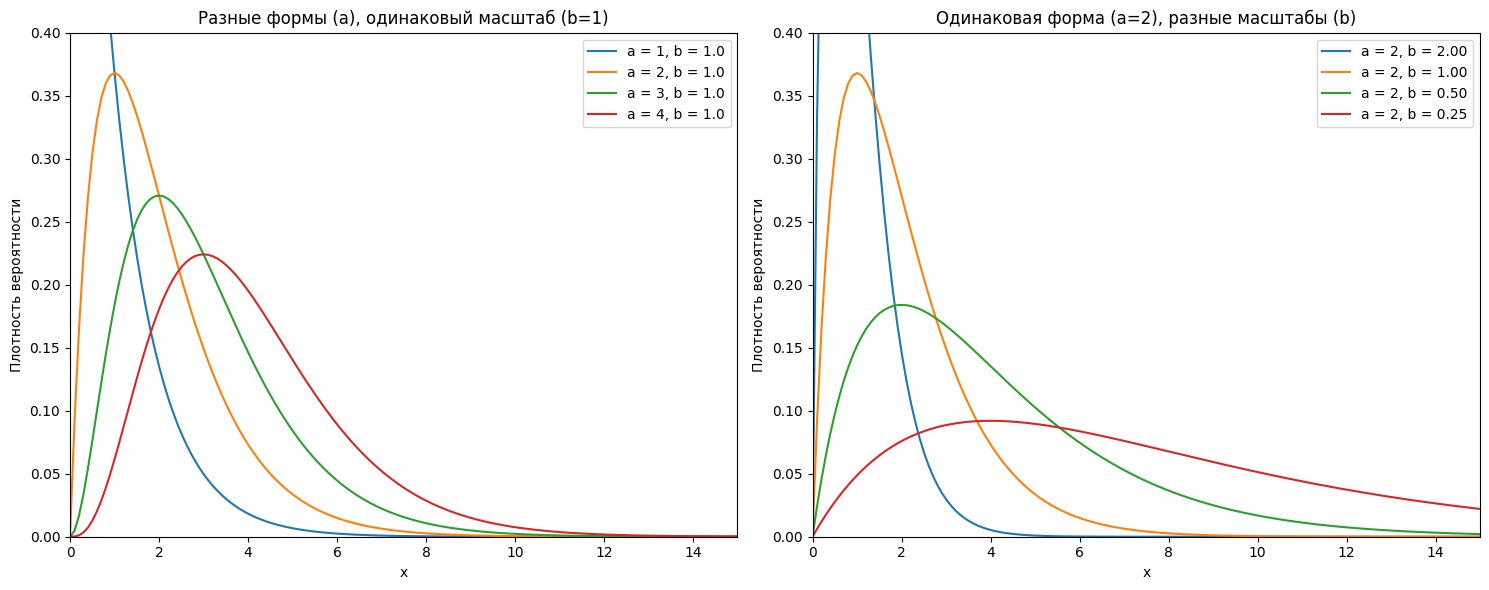

In [ ]:
# @title Графики плотности
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gamma
import numpy as np

# Создаем фигуру с двумя подграфиками (сабплотами)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

xlin = np.linspace(0,20,200)

# Первый график: разные формы (a), одинаковый масштаб (b=1)
shapes1 = [1, 2, 3, 4]
scales1 = [1, 1, 1, 1] # scale = 1/b, поэтому b = 1/scale = 1

for shape, scale in zip(shapes1, scales1):
    ax1.plot(xlin, gamma.pdf(xlin, a=shape, loc=0, scale=scale),
             label=f'a = {shape}, b = {1/scale}')
ax1.legend(loc="upper right")
ax1.set_ylim([0,0.4])
ax1.set_xlim([0,15])
ax1.set_title('Разные формы (a), одинаковый масштаб (b=1)')
ax1.set_xlabel('x')
ax1.set_ylabel('Плотность вероятности')

# Второй график: одинаковая форма (a=2), разные масштабы (b)
shapes2 = [2, 2, 2, 2]
scales2 = [1/2, 1, 2, 4] # scale = 1/b, поэтому b = 2, 1, 0.5, 0.25

for shape, scale in zip(shapes2, scales2):
    ax2.plot(xlin, gamma.pdf(xlin, a=shape, loc=0, scale=scale),
             label=f'a = {shape}, b = {1/scale:.2f}')
ax2.legend(loc="upper right")
ax2.set_ylim([0,0.4])
ax2.set_xlim([0,15])
ax2.set_title('Одинаковая форма (a=2), разные масштабы (b)')
ax2.set_xlabel('x')
ax2.set_ylabel('Плотность вероятности')

plt.tight_layout()
plt.show()

**Пояснения**

Параметр $a$ (форма) определяет качественный вид кривой: при $a=1$ она строго убывает, а при $a>1$ приобретает "горб", становясь всё более симметричной с ростом $a$.

Параметр $b$ отвечает за масштаб: он растягивает или сжимает график по горизонтали, из-за чего пик становится ниже, а хвост — визуально тяжелее, чтобы сохранить общую площадь под кривой равной единице.

Гамма-распределение с параметром формы $a=1$ в точности является экспоненциальным распределением.

При больших значениях параметра формы $a$ гамма-распределение хорошо аппроксимируется нормальным распределением. Это означает, что если a достаточно велико, форма гамма-распределения становится практически неотличимой от колоколообразной кривой нормального распределения.

In [ ]:
# @title Пример

#Месячное (каждый август) количество осадков, зафиксированное на станции Pooraka (Австралия) с 1876 года.

# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy import stats
# from scipy.stats import gamma
# import numpy as np

# data = pd.read_csv('/content/Pooraka_rainfall_data.csv')
# data_new = data['Aug'].dropna()
# xlin = np.linspace(0,160,50)
# fit_shape, fit_loc, fit_scale=gamma.fit(data_new)

# plt.hist(data_new, bins=10, density=True)
# plt.plot(xlin,gamma.pdf(xlin,a=fit_shape,loc = fit_loc, scale = fit_scale))
# plt.show()

# Задача 2

Пусть $X_1, X_2, \ldots, X_n$ — выборка из распределения Пуассона с параметром $\lambda$. Найти байесовскую оценку $\lambda$ как математическое ожидание апостериорного распределения
$$
\mathsf P(\lambda|D),
$$
выбирая в качестве априорного распределения — гамма распределение, то есть
$$
\mathsf P(\lambda) = \frac{b^a}{\Gamma (a)}\lambda^{a-1}e^{-b\lambda}, \quad \lambda > 0.
$$
Сравнить полученную байесовсую оценку с оценкой MLE. Подумать про предсказательное распределение.

Напомним, что плотность распределения в случае распределения Пуассона имеет вид:

$$
f_\lambda(t) = \mathsf P (X_1 = t) = \frac{\lambda^t}{t!}e^{-\lambda}, \ t \in \{0, 1, ... \}.
$$

## Решение

$$
\mathsf P(\lambda|D) = \frac{\mathsf P(\lambda)\mathsf P(D|\lambda)}{\mathsf P(D)}
$$

Части:

$$
\mathsf P(\lambda) = \frac{b^a}{\Gamma (a)}\lambda^{a-1}e^{-b\lambda}
$$

$$
\mathsf P(D|\lambda) = \frac{1}{\prod_{i=1}^n X_i!}\cdot \lambda^{n\overline{X}}\cdot e^{-n\lambda}
$$

$$
\mathsf P(D) = \int\limits_{\lambda}\mathsf P(\lambda)\cdot \mathsf P(D|\lambda) d\lambda
$$

Итого:

$$
\mathsf P(\lambda|D) = \frac{\frac{b^a}{\Gamma (a)}\lambda^{a-1}e^{-b\lambda}\cdot \frac{1}{\prod_{i=1}^n X_i!}\cdot \lambda^{n\overline{X}}\cdot e^{-n\lambda}}{\int\limits_{\lambda}\frac{b^a}{\Gamma (a)}\lambda^{a-1}e^{-b\lambda}\cdot \frac{1}{\prod_{i=1}^n X_i!}\cdot \lambda^{n\overline{X}}\cdot e^{-n\lambda}d\lambda} =
$$

$$
= \frac{\lambda^{n\overline{X}+a-1}\cdot e^{-\lambda(b+n)}}{\int\limits_{0}^{+\infty}\lambda^{n\overline{X}+a-1}\cdot e^{-\lambda(b+n)}d\lambda}.
$$

В интеграле замена $t = \lambda(b+a)$, тогда

$$
\lambda = \frac{t}{b+n},
$$

$$
(b+n)d\lambda = dt
$$

и

$$
\mathsf P(\lambda|D) = \frac{\left(b+n\right)^{n\overline{X}+a}}{\Gamma\left(n\overline{X}+a\right)} \cdot \lambda^{n\overline{X}+a-1}\cdot e^{-\lambda(b+n)} = \Gamma\left(n\overline{X}+a, b+n\right).
$$

Откуда оценка $\lambda$ как математическое ожидание апостериорного распределения будет иметь вид

$$
\hat{\lambda}_b = \frac{n\overline{X}+a}{b+n}.
$$

Оценка MLE:

$$
\hat{\lambda}_{MLE} = \overline{X}
$$

## Интерпретация



Представим, что мы только что открыли кофейню и хотим оценить среднее количество посетителей, заходящих к нам в час ($λ$). Эта оценка поможет нам планировать количество персонала в смене и закупку продуктов. Мы предполагаем, что поток клиентов случаен и независим, что хорошо описывается распределением Пуассона.

Данные ($D$): Мы собираем данные в течение $n$ часов и получаем количество посетителей в каждый час: $X_1, X_2, \ldots, X_n$.

Оценка MLE: Самая простая оценка — это среднее арифметическое наших наблюдений:
$$
\lambda_{MLE} = \overline{X}.
$$

Если за $3$ часа мы увидели $10$, $15$ и $20$ посетителей, наша оценка $\lambda$ будет $\frac{10+15+20}{3} = 15$ посетителей/час.

Пока что наблюдений мало и опираться на них, конечно, можно, но почему-бы не использовать байесовское оценивание. К тому же мы можем поспрашивать у владельцев аналогичных кофеен, как у них обстоят дела с посещаемостью.

Используем Гамма распределение, причем

* Параметр $a$ можно представить как "псевдо-количество событий", которые мы наблюдали в прошлом (или о которых мы предполагаем).
* Параметр $b$ можно представить как "псевдо-время наблюдения" (например, количество часов).

Например, нам сказали, что в месяц в аналогичной кофейне было примерно $a = 3000$ заказов, при $b=300$ часах работы.

$$
\hat{\lambda}_b = \frac{n\overline{X}+a}{b+n}.
$$

In [ ]:
# Очень сильный априор

seen = [10, 15, 20]
a = 3000
b = 300
n = len(seen)

lmbd = (sum(seen) + a) / (b + n)
lmbd

10.049504950495049

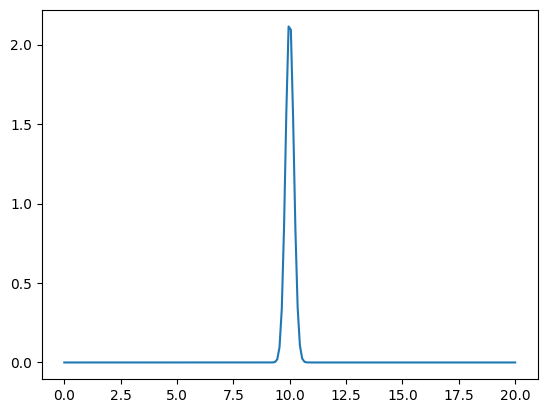

In [ ]:
# Априорное распределение для лямбда
# Видно, что далеко от 10 (МО) получить значения маловероятно
xlin = np.linspace(0,20,200)
plt.plot(xlin, gamma.pdf(xlin, a=a, loc=0, scale=1/b))

In [ ]:
# Слабый априор
# Предположим, что будет хотя бы 10 клиентов в час

seen = [10, 15, 20]
a = 10
b = 1
n = len(seen)

lmbd = (sum(seen) + a) / (b + n)
lmbd

13.75

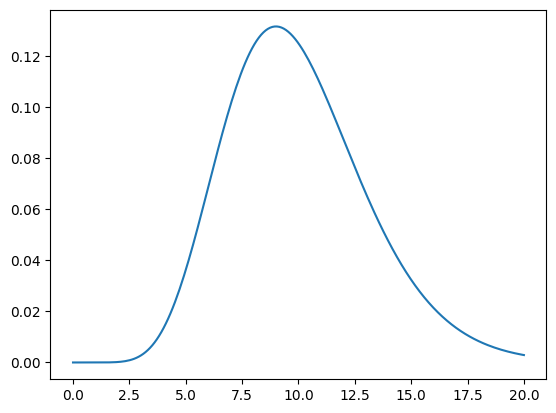

In [ ]:
# Априорное распределение для лямбда
# Видно, что далеко от 10 (МО) получить значения вполне вероятно
xlin = np.linspace(0,20,200)
plt.plot(xlin, gamma.pdf(xlin, a=a, loc=0, scale=1/b))

## Предсказательное распределение

Предсказания
$$
\mathsf P(k) = \int\limits_{\lambda} \frac{\lambda^k}{k!}e^{-\lambda}\cdot \frac{(b+n)^{n\overline{X}+a}}{\Gamma\left(n\overline{X}+a\right)} \cdot \lambda^{n\overline{X}+a-1}\cdot e^{-\lambda(b+n)} d\lambda =
$$

$$
\frac{1}{k!} \cdot \frac{(b+n)^{n\overline{X}+a}}{\Gamma\left(n\overline{X}+a\right)} \int\limits_{\lambda} \lambda^{k+n\overline{X}+a-1}\cdot e^{-\lambda(b+n+1)} d\lambda.
$$

Отдельно интеграл. Замена $t = \lambda(b+n+1)$, $d\lambda = \frac{dt}{b+n+1}$

$$
\int\limits_{\lambda} \left(\frac{t}{b+n+1}\right)^{k+n\overline{X}+a-1}\cdot e^{-t}\cdot \frac{dt}{b+n+1} =
$$

$$
=\left(\frac{1}{b+n+1}\right)^{k+n\overline{X}+a}\cdot \Gamma(k+n\overline{X}+a)
$$

Итого

$$
\mathsf P(k) = \frac{1}{k!} \cdot \left(\frac{b+n}{b+n+1}\right)^{n\overline{X}+a}\cdot \left(\frac{1}{b+n+1}\right)^{k} \cdot \frac{\Gamma(k+n\overline{X}+a)}{\Gamma(n\overline{X}+a)}
$$

# Задача 3

Пусть $X_1, X_2, \ldots, X_n$ — выборка из экспоненциального распределения с параметром $\lambda$. Найти оценку максимального правдоподобия параметра $\lambda$, сравнить ее с байесовской оценкой, подобрав сопряженное распределение. Сравнить полученную байесовсую оценку с оценкой MLE. Подумать про предсказательное распределение.

Если генеральная совокупность $\xi$ имеет показательное распределение $ \mathsf{Exp}_\theta$, то

$$
f_\xi(t) = \begin{cases}
 0, & t < 0 \\
 \theta e^{-\theta t}, & t \geq 0
 \end{cases},
$$

## Решение

$$
\mathsf P(\lambda|D) = \frac{\mathsf P(\lambda)\mathsf P(D|\lambda)}{\mathsf P(D)}
$$

Части:

$$
\mathsf P(\lambda) = \frac{b^a}{\Gamma (a)}\lambda^{a-1}e^{-b\lambda}
$$

$$
\mathsf P(D|\lambda) = \lambda^{n}\cdot e^{-n\lambda\overline{X}}
$$

$$
\mathsf P(D) = \int\limits_{\lambda}\mathsf P(\lambda)\cdot \mathsf P(D|\lambda) d\lambda
$$

Итого:

$$
\mathsf P(\lambda|D) = \frac{\frac{b^a}{\Gamma (a)}\lambda^{a-1}e^{-b\lambda}\cdot  \lambda^{n}\cdot e^{-n\lambda\overline{X}}}{\int\limits_{\lambda}\frac{b^a}{\Gamma (a)}\lambda^{a-1}e^{-b\lambda}\cdot  \lambda^{n}\cdot e^{-n\lambda\overline{X}}d\lambda} =
$$

$$
= \frac{\lambda^{n+a-1}\cdot e^{-\lambda(b+n\overline{X})}}{\int\limits_{0}^{+\infty}\lambda^{n+a-1}\cdot e^{-\lambda(b+n\overline{X})}d\lambda}.
$$

В интеграле замена $t = \lambda(b+n\overline{X})$, тогда

$$
\lambda = \frac{t}{b+n\overline{X}},
$$

$$
(b+n\overline{X})d\lambda = dt
$$

и

$$
\mathsf P(\lambda|D) = \frac{\left(b+n\overline{X}\right)^{n+a}}{\Gamma\left(n+a\right)} \cdot \lambda^{n+a-1}\cdot e^{-\lambda(b+n\overline{X})} = \Gamma\left(n+a, b+n\overline{X}\right).
$$

Откуда математическое ожидание будет равно

$$
\frac{n+a}{b+n\overline{X}}.
$$

Тогда байесовская оценка $\lambda$ оценка MLE будут иметь вид

$$
\hat{\lambda}_b = \frac{n+a}{b+n\overline{X}}
$$

и

$$
\hat{\lambda}_{MLE} = \frac{1}{\overline{X}}
$$

соответственно.


## Интерпретация

Предположим мы снова в нашей кофейне. В предыдущей задаче мы оценивали средний поток клиентов $\lambda$ (клиентов/час), подсчитывая их количество за каждый час. Теперь мы попробуем оценить тот же самый параметр $\lambda$, но другим методом.

Мы встанем у входа с секундомером и будем измерять время между приходом каждого следующего посетителя. Если поток клиентов действительно случаен (что описывается процессом Пуассона), то время между последовательными событиями будет распределено по экспоненциальному закону.

Данные ($D$): Мы замерили $n$ временных интервалов между приходами клиентов: $X_1, X_2, \ldots, X_n$ (например, $3.5$ минуты, $2.1$ минуты, $5$ минут и т.д.).

Оценка MLE: Для экспоненциального распределения

$$
\hat{\lambda}_{MLE} = \frac{1}{\overline{X}}
$$

То есть если среднее время между клиентами составляет $4$ минуты ($1/15$ часа), то средняя интенсивность потока $\lambda$ составит $15$ клиентов в час.

Как и в прошлый раз, мы можем иметь априорные ожидания о $\lambda$. Мы снова используем Гамма-распределение, так как оно является сопряженным, а его параметры легко интерпретировать в контексте потока событий:

* Параметр $a$ можно представить как "псевдо-количество пришедших клиентов"
* Параметр $b$ можно представить как "псевдо-время (общее) наблюдения".

Можем воспроизвести эксперимент из задачи 2. Напомним, что там были данные по количеству посетителей за 3 часа: $[10, 15, 20]$.

Здесь в массиве `seen` у нас должны быть тогда временные интервалы между этими посетителями. Для удобства возьмем их одинаковыми в рамках каждого часа. Итого за первый час $10$ посетителей, значит интервалы $6$ минут, за второй час $15$ записей времени по $4$ минуты и еще $20$ трехминутных интервалов. Не забудем перевести минуты в часы.

In [ ]:
seen = np.array([6]*10 + [4]*15 + [3]*20) / 60
seen

array([0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.05      , 0.05      , 0.05      , 0.05      , 0.05      ,
       0.05      , 0.05      , 0.05      , 0.05      , 0.05      ,
       0.05      , 0.05      , 0.05      , 0.05      , 0.05      ,
       0.05      , 0.05      , 0.05      , 0.05      , 0.05      ])

In [ ]:
# Очень сильный априор
# За 300 часов прошло 3000 клиенотов

a = 3000
b = 300
n = len(seen)

lmbd = (n + a) / (b + sum(seen))
lmbd

np.float64(10.049504950495049)

In [ ]:
# Слабый априор
# Предположим, априорно, что будет хотя бы 10 клиентов в час

seen = np.array([6]*10 + [4]*15 + [3]*20) / 60
a = 10
b = 1
n = len(seen)

lmbd = (n + a) / (b + sum(seen))
lmbd

np.float64(13.750000000000012)

## TODO: Предсказательное распределение

# TODO: Мультиномиальное распределение